# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS1
Not in Simbad

## ESASky
https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [40]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [41]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                 59.3198     using 62 bins.

Test statistic : Chi-Squared                 47.3713     using 62 bins.
 Null hypothesis probability of 8.1457e-01 with 57 degrees of freedom
 Current data and model not fit yet.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [42]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EMOS1_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.387e-03 +/- 4.972e-04 (35.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-67
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.818e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020137_SRCNUM21_EMOS1_background_spectrum.fits
  Background Exposure Time: 1.818e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EMOS1.arf


Fit statistic  : C-Statistic                 62.1180     using 67 bins.

Test statistic : Chi-Squared                 48.4586     using 67 bins.
 Null hypothesis probability of 8.9559e-01 with 62 degrees of freedom
 Current data and model not fit yet.


In [4]:
n_cts = 1.387e-03*1.818e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 25.21566

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [44]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")
AllModels.calcFlux(".2 12.0")

***Warning: Fit is not current.
     5 channels (1-5) ignored in spectrum #     1
      No channels ignored (no channels in specified range)

Fit statistic  : C-Statistic                 59.3198     using 62 bins.

Test statistic : Chi-Squared                 47.3713     using 62 bins.
 Null hypothesis probability of 8.1457e-01 with 57 degrees of freedom
 Current data and model not fit yet.

 Model Flux 9.4504e-06 photons (3.2399e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


(-0.5, 854.5, 651.5, -0.5)

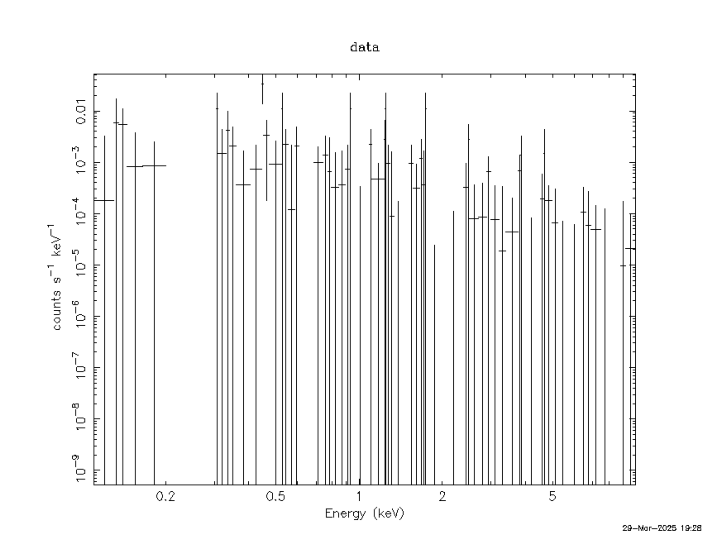

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [45]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.044966e+07     using 62 bins.

Test statistic : Chi-Squared              5.033321e+12     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
75.5543      4.17138e+06  -3      0.489171       199.337   0.000116683
72.1307      15.0105      -3     0.0631490       199.353     0.0414566
70.4893      10.0591      -4     0.0215780       199.359      0.133822
7

(-0.5, 852.5, 659.5, -0.5)

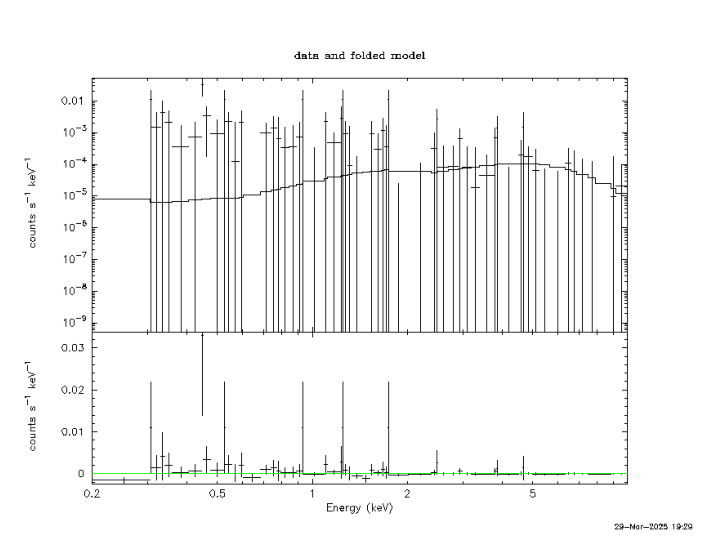

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model (Second best fit)
**tbabs :**

In [47]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.682386e+06     using 62 bins.

Test statistic : Chi-Squared              2.186182e+11     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.36758e+06  866297       -3      0.377251       198.397      0.333922
297569       702200       -1     0.0441299       199.209     0.0511137
127051       977064       -1     0.0204044       199.334     0.0209399


(-0.5, 855.5, 650.5, -0.5)

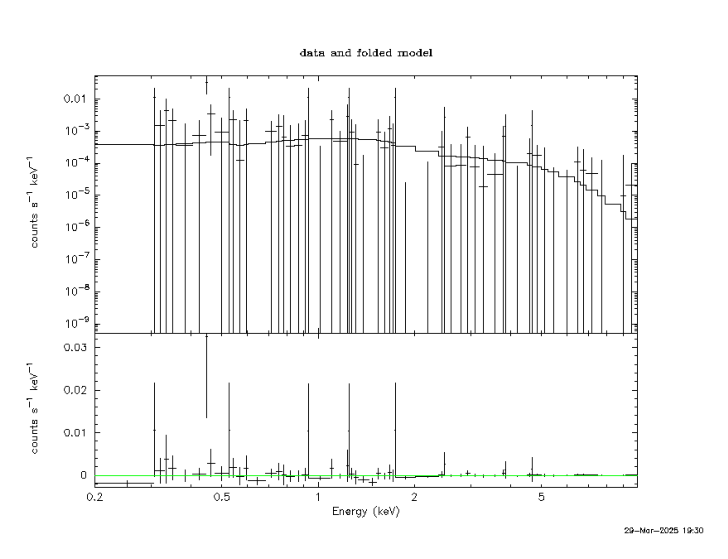

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model (Best fit)
**tbabs :**

In [48]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.690787e+06     using 62 bins.

Test statistic : Chi-Squared              4.490992e+10     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
639225       490315       -3      0.357238       47.5518      0.301776
215203       36307

(-0.5, 856.5, 657.5, -0.5)

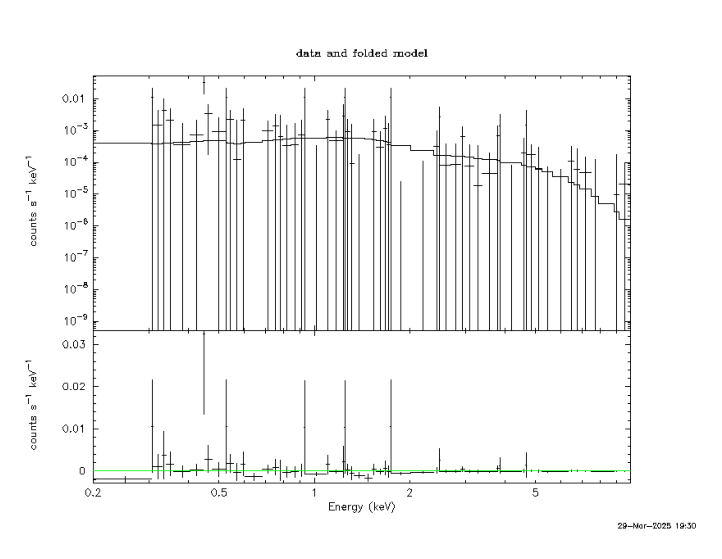

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [49]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.153090e+07     using 62 bins.

Test statistic : Chi-Squared              1.287475e+12     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
7.15656e+06  2.93631e+06   0      0.170581       8.35568     0.0657862
75.5639      2.30656e+07  -1       17644.7      0.536315       771.599
75.5287      9.30546e-52  19       8711.02      -2.36682   1.00000e+2

(-0.5, 850.5, 659.5, -0.5)

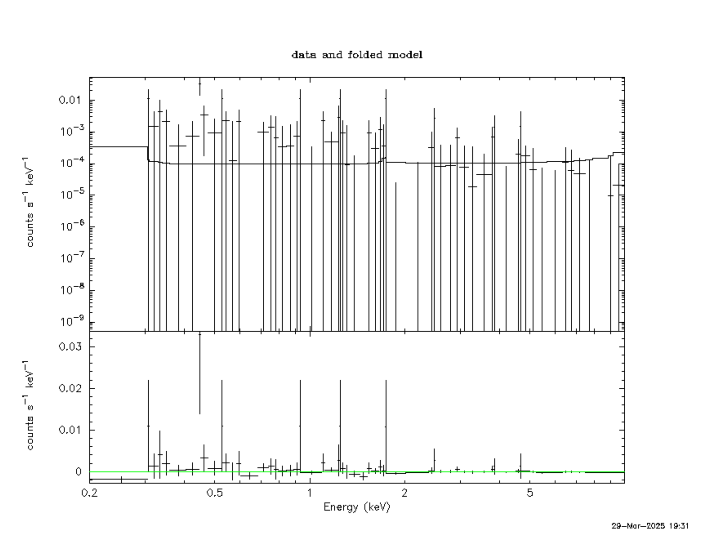

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
X-ray binaries

In [50]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              3.198181e+07     using 62 bins.

Test statistic : Chi-Squared              1.092768e+13     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 57 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
1.16352e+06  3.09777e

(-0.5, 850.5, 654.5, -0.5)

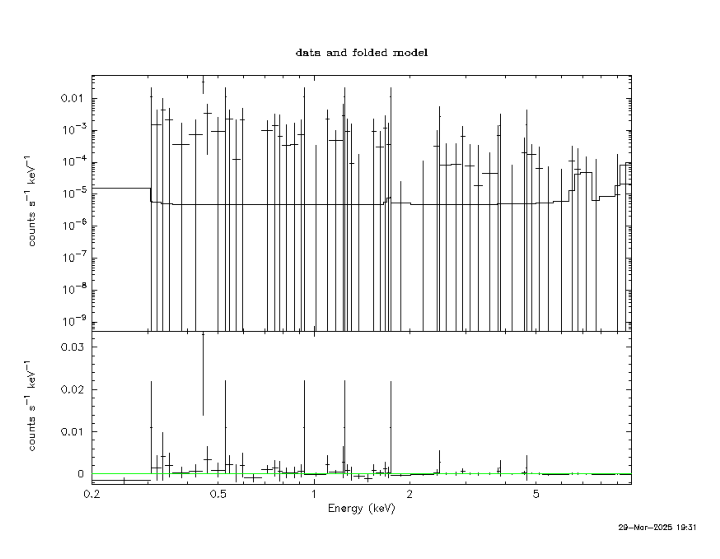

In [16]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw2.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model (Best fit (bis))

In [51]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              3.382496e+06     using 62 bins.

Test statistic : Chi-Squared              1.796397e+11     using 62 bins.
 Null hypothesis probability

(-0.5, 856.5, 664.5, -0.5)

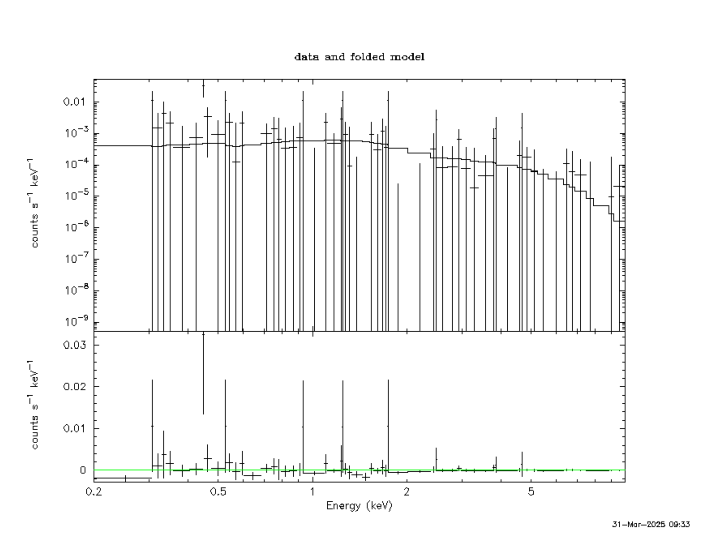

In [30]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec2.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 2*10^20 cm^-2

In [52]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print()
print(color.BOLD+"apec+apec"+color.END)
print(f"(tbabs) : {nH_apecapec*10**22}")

The different models give a column density of :

bbody
(tbabs) : 30757672.270484105

bremss
(tbabs) : 717009738822787.5

apec
(tbabs) : 10117753271313.098

powerlaw
(tbabs) : 8.711018762459803e+25

bbody+powerlaw
(tbabs) : 9.836757783955879e+24

apec+apec
(tbabs) : 1617350389.4651144


## Flux
### X-ray flux
- X-ray Flux of the best-fitting model ``Apec`` and ``Apec + Apec`` with C-statistic = 59.3198 using 62 bins: **3.2353e-14 ergs/cm^2/s** and **3.2300e-14 ergs/cm^2/s** respectively.
- X-ray Flux of the second best-fitting model ``Bremsstrahlung`` with Chi-squared = 59.4340 using 62 bins: **3.4168e-14 ergs/cm^2/s**.

In [54]:
Flux = 3.2353e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec model: F_x-ray = {Flux} ergs/cm^2/s")

X-ray flux : 
Apec model: F_x-ray = 3.2353e-14 ergs/cm^2/s


### Optical flux

In [55]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical  flux (lower limit) : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux (lower limit) : F_opt = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [56]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 0.587117815316808
F_x-ray = 0.587117815316808*F_optical


## Luminosity
No distance available on ESASky.

In [57]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [3.8710771139178886e+24, 3.871077113917888e+30] erg/s
For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [3.8710771139178885e+36, 3.871077113917889e+44] erg/s


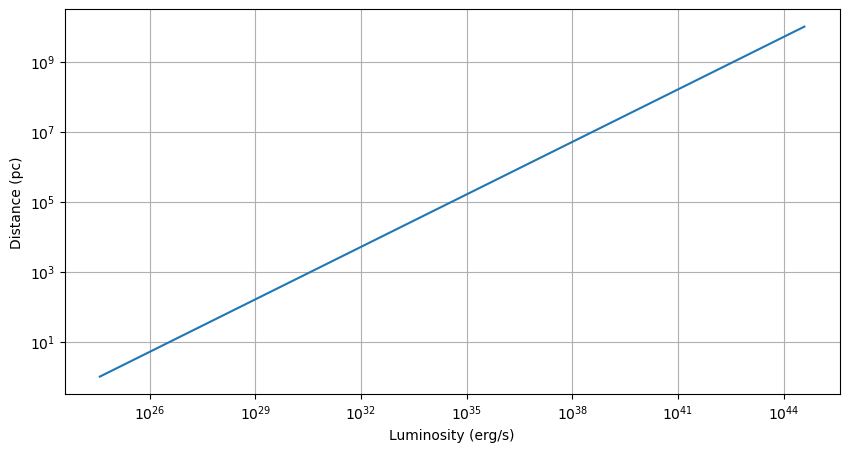

In [58]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()